# Duke Recon - Kernel Size Optimization

## Load Libraries

In [8]:
from scipy.io import loadmat
import tkinter as tk
from tkinter import filedialog
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import skimage.util
from skimage.metrics import structural_similarity as ssim
from main.DukeImageRecon import reconstruct

parent_dir = os.getcwd()
N = 128
I = 1j

## Load Data

In [9]:
# DATA
# create a Tkinter root window (it won't be shown)
root = tk.Tk()
root.withdraw()  # hide the main window
# ask the user to select the file
file_path = filedialog.askopenfilename(title="Select the Phasor/Data File")
phasors_128 = np.load(file_path)
#phasors_128 = phasors_128.reshape((phasors_128.shape[0], 1))

In [10]:
# TRAJECTORY
# loading trajectory 
if parent_dir.endswith('DukeRecon'):
    os.chdir('..')
traj = loadmat('traj/traj_gas_afia.mat')
current_dir = os.getcwd()
# k-space x, y, and z points 
kx = traj['data'][:,:,0].ravel()
ky = traj['data'][:,:,1].ravel()
kz = traj['data'][:,:,2].ravel()
# rescaling based on N
#kx = kx*N
#ky = ky*N
#kz = kz*N
# trajectory has already been scaled!
trajlist = np.column_stack((kx, ky, kz))

## Add Gaussian Noise to Phasors 

### 1% Noise Fraction

In [11]:
# add random gaussian noise to phasors 
# calculate maximum range of real and imaginary parts
max_range_real = np.max(np.real(phasors_128)) - np.min(np.real(phasors_128))
max_range_imaginary = np.max(np.imag(phasors_128)) - np.min(np.imag(phasors_128))

# setting the noise level as a fraction of the maximum range 
fraction = 0.01 # 1% noise
noise_level_real = max_range_real * fraction
noise_level_imaginary = max_range_imaginary * fraction

# add Gaussian noise to real and imaginary parts separately
real_noise = np.random.normal(loc=0, scale=noise_level_real, size=phasors_128.shape)
imaginary_noise = np.random.normal(loc=0, scale=noise_level_imaginary, size=phasors_128.shape)
noisy_phasors_1perc = phasors_128 + real_noise + 1j * imaginary_noise

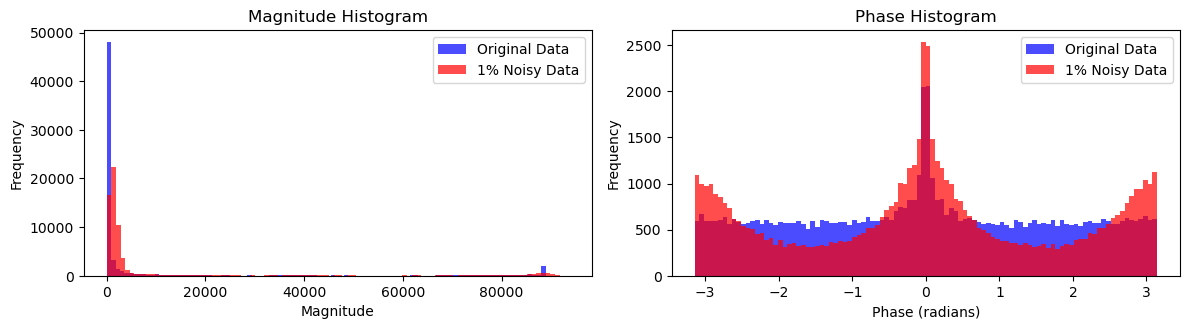

In [12]:
# magnitudes and phases 
magnitudes = np.abs(phasors_128)
phases = np.angle(phasors_128)

noisy_magnitudes = np.abs(noisy_phasors_1perc)
noisy_phases = np.angle(noisy_phasors_1perc)

# histograms of magnitudes
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(magnitudes, bins=100, color='blue', alpha=0.7, label='Original Data')
plt.hist(noisy_magnitudes, bins=100, color='red', alpha=0.7, label='1% Noisy Data')
plt.title('Magnitude Histogram')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.legend()

# histograms of phases
plt.subplot(2, 2, 2)
plt.hist(phases, bins=100, color='blue', alpha=0.7, label='Original Data')
plt.hist(noisy_phases, bins=100, color='red', alpha=0.7, label='1% Noisy Data')
plt.title('Phase Histogram')
plt.xlabel('Phase (radians)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

### 2% Noise Fraction

In [46]:
# setting the noise level as a fraction of the maximum range 
fraction = 0.02
noise_level_real = max_range_real * fraction
noise_level_imaginary = max_range_imaginary * fraction

# add Gaussian noise to real and imaginary parts separately
real_noise = np.random.normal(loc=0, scale=noise_level_real, size=phasors_128.shape)
imaginary_noise = np.random.normal(loc=0, scale=noise_level_imaginary, size=phasors_128.shape)
noisy_phasors_2perc = phasors_128 + real_noise + 1j * imaginary_noise

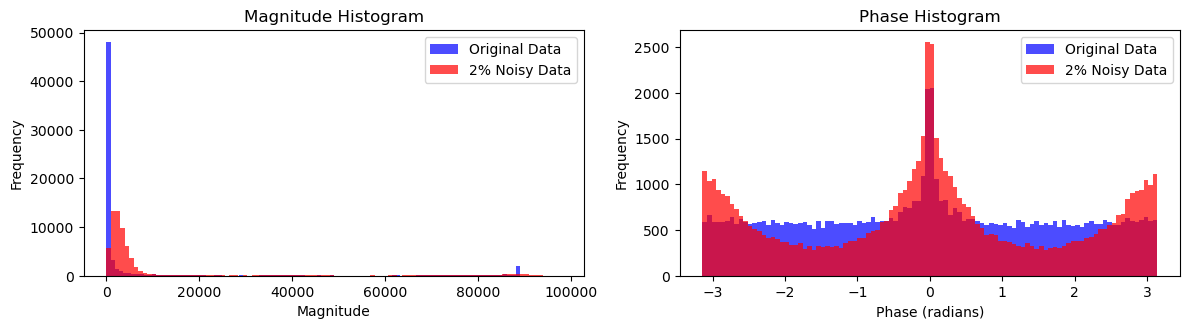

In [47]:
# magnitudes and phases 
noisy_magnitudes = np.abs(noisy_phasors_2perc)
noisy_phases = np.angle(noisy_phasors_2perc)

# histograms of magnitudes
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(magnitudes, bins=100, color='blue', alpha=0.7, label='Original Data')
plt.hist(noisy_magnitudes, bins=100, color='red', alpha=0.7, label='2% Noisy Data')
plt.title('Magnitude Histogram')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.legend()

# histograms of phases
plt.subplot(2, 2, 2)
plt.hist(phases, bins=100, color='blue', alpha=0.7, label='Original Data')
plt.hist(noisy_phases, bins=100, color='red', alpha=0.7, label='2% Noisy Data')
plt.title('Phase Histogram')
plt.xlabel('Phase (radians)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

### 3% Noise Fraction

In [30]:
# setting the noise level as a fraction of the maximum range 
fraction = 0.03
noise_level_real = max_range_real * fraction
noise_level_imaginary = max_range_imaginary * fraction

# add Gaussian noise to real and imaginary parts separately
real_noise = np.random.normal(loc=0, scale=noise_level_real, size=phasors_128.shape)
imaginary_noise = np.random.normal(loc=0, scale=noise_level_imaginary, size=phasors_128.shape)
noisy_phasors_3perc = phasors_128 + real_noise + 1j * imaginary_noise

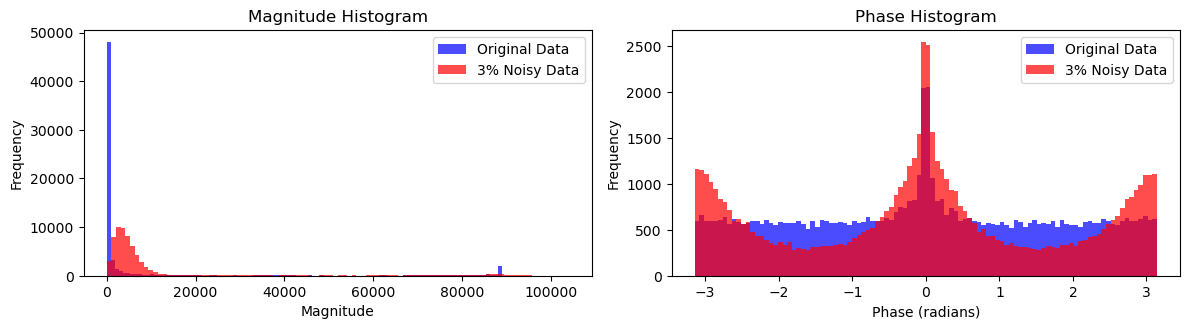

In [31]:
# magnitudes and phases 
noisy_magnitudes = np.abs(noisy_phasors_3perc)
noisy_phases = np.angle(noisy_phasors_3perc)

# histograms of magnitudes
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(magnitudes, bins=100, color='blue', alpha=0.7, label='Original Data')
plt.hist(noisy_magnitudes, bins=100, color='red', alpha=0.7, label='3% Noisy Data')
plt.title('Magnitude Histogram')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.legend()

# histograms of phases
plt.subplot(2, 2, 2)
plt.hist(phases, bins=100, color='blue', alpha=0.7, label='Original Data')
plt.hist(noisy_phases, bins=100, color='red', alpha=0.7, label='3% Noisy Data')
plt.title('Phase Histogram')
plt.xlabel('Phase (radians)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

## Load in Original Synthesized Image

In [19]:
root = tk.Tk()
root.withdraw()  # hide the main window
# ask the user to select the file
file_path = filedialog.askopenfilename(title="Select the Synthesized Image File")
original_image = np.load(file_path)

In [20]:
def makeSlide(A):
    ''' displays 3D array as a 2D grayscale image montage'''
    plt.imshow(skimage.util.montage([abs(A[:,:,k]) 
                                     for k in range(0,A.shape[2])], padding_width=1, fill=0), cmap='gray')
    plt.show()

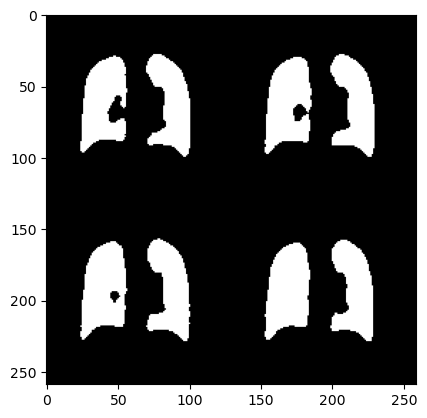

In [82]:
makeSlide(original_image[:,:,73:77])

## Reconstruct High SNR Image with Various Kernel Sharpness (KS) & Kernel Extent (KE)

### Original (Default) Parameters 

For high SNR images, kernel sharpness = float(0.14) and kernel extent = 9 * float(0.14).

In [90]:
noisy_phasors_1perc = noisy_phasors_1perc.reshape((noisy_phasors_1perc.shape[0], 1)) # reshape for recon function
noisy_phasors_1perc_image = reconstruct(data=noisy_phasors_1perc, traj=trajlist, kernel_sharpness=float(0.14), kernel_extent=9*float(0.14))
noisy_phasors_1perc_image = np.transpose(noisy_phasors_1perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1] # swap and rotate axes

noisy_phasors_2perc = noisy_phasors_2perc.reshape((noisy_phasors_2perc.shape[0], 1))
noisy_phasors_2perc_image = reconstruct(data=noisy_phasors_2perc, traj=trajlist, kernel_sharpness=float(0.14), kernel_extent=9*float(0.14))
noisy_phasors_2perc_image = np.transpose(noisy_phasors_2perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1]

noisy_phasors_3perc = noisy_phasors_3perc.reshape((noisy_phasors_3perc.shape[0], 1))
noisy_phasors_3perc_image = reconstruct(data=noisy_phasors_3perc, traj=trajlist, kernel_sharpness=float(0.14), kernel_extent=9*float(0.14))
noisy_phasors_3perc_image = np.transpose(noisy_phasors_3perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1]

Execution time: 8.38 seconds
Execution time: 7.98 seconds
Execution time: 7.78 seconds


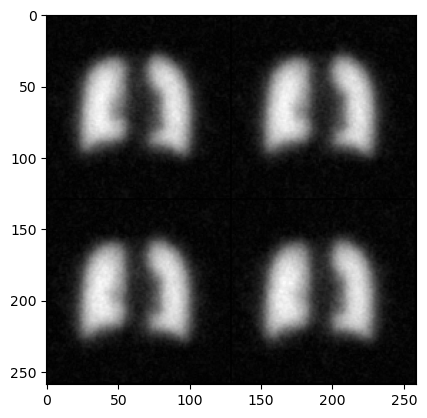

In [94]:
makeSlide(noisy_phasors_1perc_image[:,:,73:77])

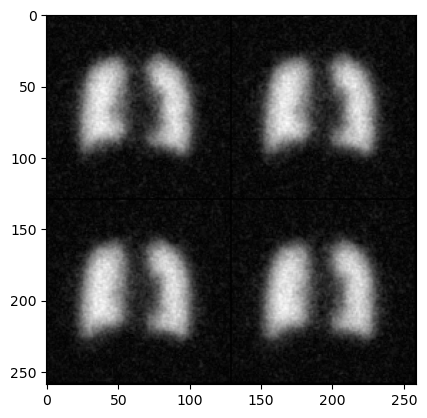

In [95]:
makeSlide(noisy_phasors_2perc_image[:,:,73:77])

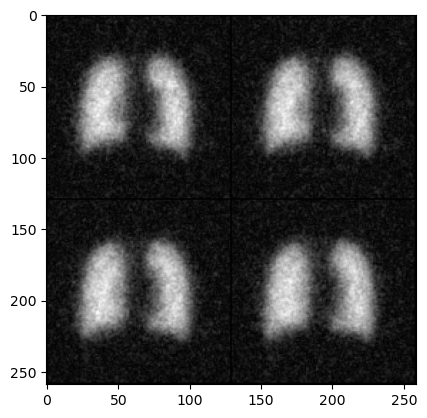

In [96]:
makeSlide(noisy_phasors_3perc_image[:,:,73:77])

In [97]:
psnr_3d_complex(noisy_phasors_1perc_image, original_image)

74.7768396682101

In [98]:
psnr_3d_complex(noisy_phasors_2perc_image, original_image)

72.40088356633447

In [99]:
psnr_3d_complex(noisy_phasors_3perc_image, original_image)

70.68677811404909

In [100]:
ssim(original_image, noisy_phasors_1perc_image, data_range=original_image.max() - original_image.min())

/Users/mia/opt/anaconda3/envs/DukePipeline/lib/python3.8/site-packages/skimage/metrics/_structural_similarity.py:199: ComplexWarning: Casting complex values to real discards the imaginary part
  im2 = im2.astype(float_type, copy=False)


0.440439964842414

In [101]:
ssim(original_image, noisy_phasors_2perc_image, data_range=original_image.max() - original_image.min())

0.26540759214342263

In [102]:
ssim(original_image, noisy_phasors_3perc_image, data_range=original_image.max() - original_image.min())

0.1587440764757499

#### Root Mean Square (RMS) Calculations

In [82]:
# RMS gives a measure of the overall magnitude or intensity 
# provides insight into the average amplitude
rms_original = np.sqrt(np.mean(np.abs(original_image)**2))
rms_noisy_1perc = np.sqrt(np.mean(np.abs(noisy_phasors_1perc_image)**2))
rms_noisy_5perc = np.sqrt(np.mean(np.abs(noisy_phasors_5perc_image)**2))
rms_noisy_10perc = np.sqrt(np.mean(np.abs(noisy_phasors_10perc_image)**2))

print("RMS value of original image:", rms_original)
print("RMS value of 1% noisy image:", rms_noisy_1perc)
print("RMS value of 5% noisy image:", rms_noisy_5perc)
print("RMS value of 10% noisy image:", rms_noisy_10perc)

RMS value of original image: 0.2058880027829242
RMS value of 1% noisy image: 0.0135084123499828
RMS value of 5% noisy image: 0.03064511330981392
RMS value of 10% noisy image: 0.05746456432035253


#### Mean Sqaure Error (MSE) Calculations

In [83]:
# MSE measures the average squared deviation between corresponding values in two datasets
# quantifies the difference between the datasets (lower values are better)
mse_1perc = np.mean(np.abs(original_image - noisy_phasors_1perc_image)**2)
mse_5perc = np.mean(np.abs(original_image - noisy_phasors_5perc_image)**2)
mse_10perc = np.mean(np.abs(original_image - noisy_phasors_10perc_image)**2)

print("MSE (1% noise):", mse_1perc)
print("MSE (5% noise):", mse_5perc)
print("MSE (10% noise):", mse_10perc)

MSE (1% noise): 0.03772668630133024
MSE (5% noise): 0.03847658655383347
MSE (10% noise): 0.040817501939644


### Parameters: KS=0.12 and KE=9*0.12

In [84]:
noisy_phasors_1perc = noisy_phasors_1perc.reshape((noisy_phasors_1perc.shape[0], 1))
noisy_phasors_1perc_image = reconstruct(data=noisy_phasors_1perc, traj=trajlist, kernel_sharpness=float(0.12), kernel_extent=9*float(0.12))
noisy_phasors_1perc_image = np.transpose(noisy_phasors_1perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1]

noisy_phasors_5perc = noisy_phasors_5perc.reshape((noisy_phasors_5perc.shape[0], 1))
noisy_phasors_5perc_image = reconstruct(data=noisy_phasors_5perc, traj=trajlist, kernel_sharpness=float(0.12), kernel_extent=9*float(0.12))
noisy_phasors_5perc_image = np.transpose(noisy_phasors_5perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1]

noisy_phasors_10perc = noisy_phasors_10perc.reshape((noisy_phasors_10perc.shape[0], 1))
noisy_phasors_10perc_image = reconstruct(data=noisy_phasors_10perc, traj=trajlist, kernel_sharpness=float(0.12), kernel_extent=9*float(0.12))
noisy_phasors_10perc_image = np.transpose(noisy_phasors_10perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1]

Execution time: 8.57 seconds
Execution time: 7.64 seconds
Execution time: 8.95 seconds


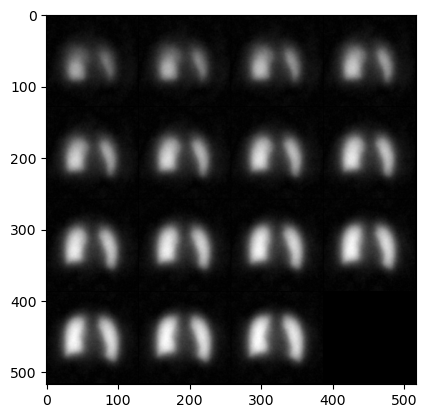

In [85]:
makeSlide(noisy_phasors_1perc_image[:,:,50:65])

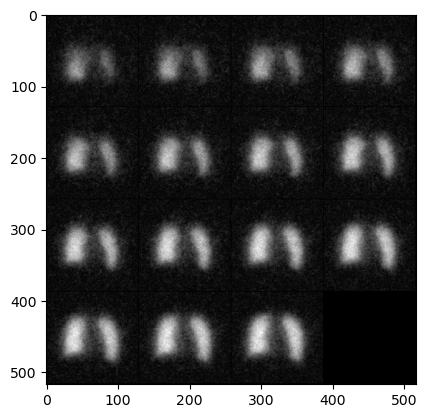

In [86]:
makeSlide(noisy_phasors_5perc_image[:,:,50:65])

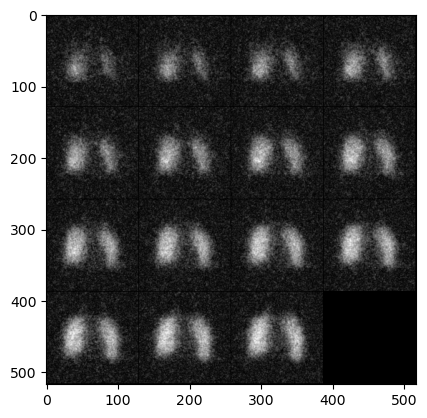

In [87]:
makeSlide(noisy_phasors_10perc_image[:,:,50:65])

#### RMS Calculation

In [88]:
# RMS gives a measure of the overall magnitude or intensity 
# provides insight into the average amplitude
rms_original = np.sqrt(np.mean(np.abs(original_image)**2))
rms_noisy_1perc = np.sqrt(np.mean(np.abs(noisy_phasors_1perc_image)**2))
rms_noisy_5perc = np.sqrt(np.mean(np.abs(noisy_phasors_5perc_image)**2))
rms_noisy_10perc = np.sqrt(np.mean(np.abs(noisy_phasors_10perc_image)**2))

print("RMS value of original image:", rms_original)
print("RMS value of 1% noisy image:", rms_noisy_1perc)
print("RMS value of 5% noisy image:", rms_noisy_5perc)
print("RMS value of 10% noisy image:", rms_noisy_10perc)

RMS value of original image: 0.2058880027829242
RMS value of 1% noisy image: 0.24399905467128147
RMS value of 5% noisy image: 0.2577919923016925
RMS value of 10% noisy image: 0.2986893474059187


#### MSE Calculation

In [89]:
# MSE measures the average squared deviation between corresponding values in two datasets
# quantifies the difference between the datasets (lower values are better)
mse_1perc = np.mean(np.abs(original_image - noisy_phasors_1perc_image)**2)
mse_5perc = np.mean(np.abs(original_image - noisy_phasors_5perc_image)**2)
mse_10perc = np.mean(np.abs(original_image - noisy_phasors_10perc_image)**2)

print("MSE (1% noise):", mse_1perc)
print("MSE (5% noise):", mse_5perc)
print("MSE (10% noise):", mse_10perc)

MSE (1% noise): 0.018539003422081042
MSE (5% noise): 0.025627413234507866
MSE (10% noise): 0.04802034393861296


## Reconstruct High Resolution Image with Various KS & KE

### Original (Default) Parameters

For high resolution images, kernel sharpness = float(0.32) and kernel extent = 9 * float(0.32).

In [103]:
noisy_phasors_1perc = noisy_phasors_1perc.reshape((noisy_phasors_1perc.shape[0], 1)) # reshape for recon function
noisy_phasors_1perc_image = reconstruct(data=noisy_phasors_1perc, traj=trajlist, kernel_sharpness=float(0.32), kernel_extent=9*float(0.32))
noisy_phasors_1perc_image = np.transpose(noisy_phasors_1perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1] # swap and rotate axes

noisy_phasors_2perc = noisy_phasors_2perc.reshape((noisy_phasors_2perc.shape[0], 1))
noisy_phasors_2perc_image = reconstruct(data=noisy_phasors_2perc, traj=trajlist, kernel_sharpness=float(0.32), kernel_extent=9*float(0.32))
noisy_phasors_2perc_image = np.transpose(noisy_phasors_2perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1]

noisy_phasors_3perc = noisy_phasors_3perc.reshape((noisy_phasors_3perc.shape[0], 1))
noisy_phasors_3perc_image = reconstruct(data=noisy_phasors_3perc, traj=trajlist, kernel_sharpness=float(0.32), kernel_extent=9*float(0.32))
noisy_phasors_3perc_image = np.transpose(noisy_phasors_3perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1]

Execution time: 12.94 seconds
Execution time: 13.41 seconds
Execution time: 13.26 seconds


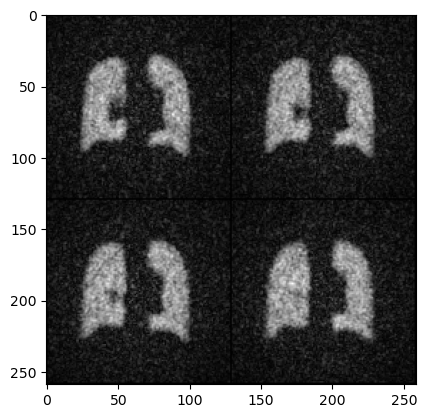

In [104]:
makeSlide(noisy_phasors_1perc_image[:,:,73:77])

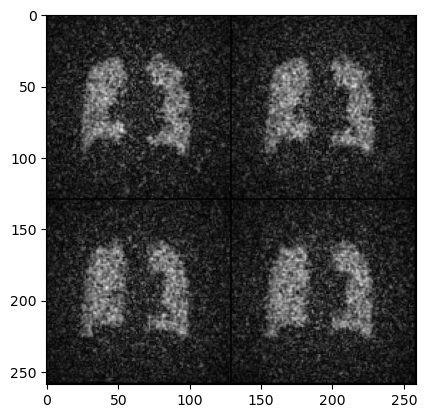

In [105]:
makeSlide(noisy_phasors_2perc_image[:,:,73:77])

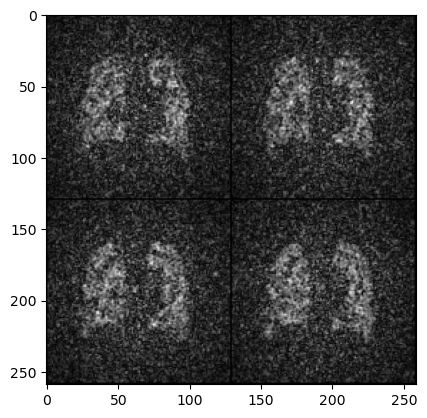

In [106]:
makeSlide(noisy_phasors_3perc_image[:,:,73:77])

In [107]:
psnr_3d_complex(noisy_phasors_1perc_image, original_image)

75.92416583603391

In [108]:
psnr_3d_complex(noisy_phasors_2perc_image, original_image)

73.50760772240882

In [109]:
psnr_3d_complex(noisy_phasors_3perc_image, original_image)

72.01428794109796

In [110]:
ssim(original_image, noisy_phasors_1perc_image, data_range=original_image.max() - original_image.min())

0.8475512835139631

In [111]:
ssim(original_image, noisy_phasors_2perc_image, data_range=original_image.max() - original_image.min())

0.7153971930216789

In [112]:
ssim(original_image, noisy_phasors_3perc_image, data_range=original_image.max() - original_image.min())

0.566199663289533

In [113]:
# RMS gives a measure of the overall magnitude or intensity 
# provides insight into the average amplitude
rms_original = np.sqrt(np.mean(np.abs(original_image)**2))
rms_noisy_1perc = np.sqrt(np.mean(np.abs(noisy_phasors_1perc_image)**2))
rms_noisy_5perc = np.sqrt(np.mean(np.abs(noisy_phasors_5perc_image)**2))
rms_noisy_10perc = np.sqrt(np.mean(np.abs(noisy_phasors_10perc_image)**2))

print("RMS value of original image:", rms_original)
print("RMS value of 1% noisy image:", rms_noisy_1perc)
print("RMS value of 5% noisy image:", rms_noisy_5perc)
print("RMS value of 10% noisy image:", rms_noisy_10perc)

RMS value of original image: 0.2058880027829242
RMS value of 1% noisy image: 0.0135084123499828
RMS value of 5% noisy image: 0.03064511330981392
RMS value of 10% noisy image: 0.05746456432035253


In [114]:
# MSE measures the average squared deviation between corresponding values in two datasets
# quantifies the difference between the datasets (lower values are better)
mse_1perc = np.mean(np.abs(original_image - noisy_phasors_1perc_image)**2)
mse_5perc = np.mean(np.abs(original_image - noisy_phasors_5perc_image)**2)
mse_10perc = np.mean(np.abs(original_image - noisy_phasors_10perc_image)**2)

print("MSE (1% noise):", mse_1perc)
print("MSE (5% noise):", mse_5perc)
print("MSE (10% noise):", mse_10perc)

MSE (1% noise): 0.03772668630133024
MSE (5% noise): 0.03847658655383347
MSE (10% noise): 0.040817501939644


### Parameters: KS=0.26 and KE=9*0.26

In [127]:
noisy_phasors_1perc = noisy_phasors_1perc.reshape((noisy_phasors_1perc.shape[0], 1)) # reshape for recon function
noisy_phasors_1perc_image = reconstruct(data=noisy_phasors_1perc, traj=trajlist, kernel_sharpness=float(0.26), kernel_extent=9*float(0.26))
noisy_phasors_1perc_image = np.transpose(noisy_phasors_1perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1] # swap and rotate axes

noisy_phasors_5perc = noisy_phasors_5perc.reshape((noisy_phasors_5perc.shape[0], 1))
noisy_phasors_5perc_image = reconstruct(data=noisy_phasors_5perc, traj=trajlist, kernel_sharpness=float(0.26), kernel_extent=9*float(0.26))
noisy_phasors_5perc_image = np.transpose(noisy_phasors_5perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1]

noisy_phasors_10perc = noisy_phasors_10perc.reshape((noisy_phasors_10perc.shape[0], 1))
noisy_phasors_10perc_image = reconstruct(data=noisy_phasors_10perc, traj=trajlist, kernel_sharpness=float(0.26), kernel_extent=9*float(0.26))
noisy_phasors_10perc_image = np.transpose(noisy_phasors_10perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1]

Execution time: 10.81 seconds
Execution time: 10.74 seconds
Execution time: 10.05 seconds


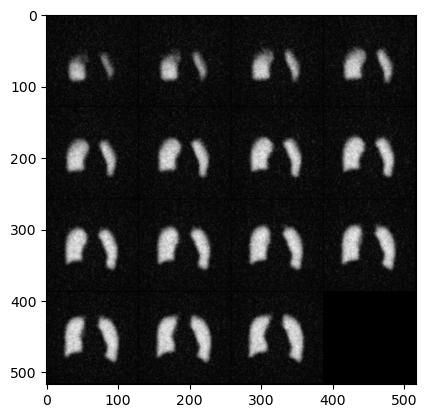

In [128]:
makeSlide(noisy_phasors_1perc_image[:,:,50:65])

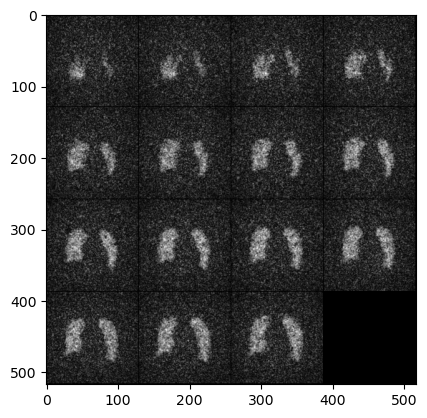

In [129]:
makeSlide(noisy_phasors_5perc_image[:,:,50:65])

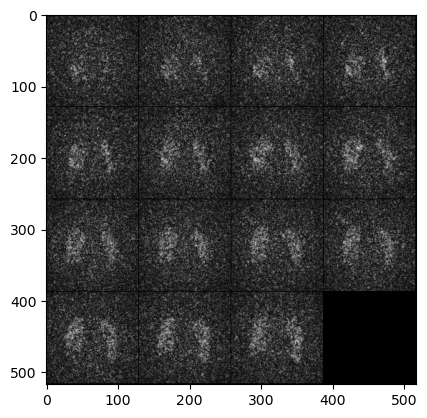

In [130]:
makeSlide(noisy_phasors_10perc_image[:,:,50:65])

#### RMS Calculation

In [131]:
# RMS gives a measure of the overall magnitude or intensity 
# provides insight into the average amplitude
rms_original = np.sqrt(np.mean(np.abs(original_image)**2))
rms_noisy_1perc = np.sqrt(np.mean(np.abs(noisy_phasors_1perc_image)**2))
rms_noisy_5perc = np.sqrt(np.mean(np.abs(noisy_phasors_5perc_image)**2))
rms_noisy_10perc = np.sqrt(np.mean(np.abs(noisy_phasors_10perc_image)**2))

print("RMS value of original image:", rms_original)
print("RMS value of 1% noisy image:", rms_noisy_1perc)
print("RMS value of 5% noisy image:", rms_noisy_5perc)
print("RMS value of 10% noisy image:", rms_noisy_10perc)

RMS value of original image: 0.2058880027829242
RMS value of 1% noisy image: 0.024098973974323763
RMS value of 5% noisy image: 0.0431424740970158
RMS value of 10% noisy image: 0.07659279460246435


#### MSE Calculation

In [132]:
# MSE measures the average squared deviation between corresponding values in two datasets
# quantifies the difference between the datasets (lower values are better)
mse_1perc = np.mean(np.abs(original_image - noisy_phasors_1perc_image)**2)
mse_5perc = np.mean(np.abs(original_image - noisy_phasors_5perc_image)**2)
mse_10perc = np.mean(np.abs(original_image - noisy_phasors_10perc_image)**2)

print("MSE (1% noise):", mse_1perc)
print("MSE (5% noise):", mse_5perc)
print("MSE (10% noise):", mse_10perc)

MSE (1% noise): 0.0339903622860603
MSE (5% noise): 0.03527031900878823
MSE (10% noise): 0.03923909417085965


## Optimization Pipeline

In [61]:
def add_noise_complex(data, fraction):
    # maximum range of real and imaginary parts
    max_range_real = np.max(np.real(data)) - np.min(np.real(data))
    max_range_imaginary = np.max(np.imag(data)) - np.min(np.imag(data))

    # noise level for real and imaginary parts
    noise_level_real = max_range_real * fraction
    noise_level_imaginary = max_range_imaginary * fraction

    # generate Gaussian random noise for real and imaginary parts separately
    real_noise = np.random.normal(loc=0, scale=noise_level_real, size=data.shape)
    imaginary_noise = np.random.normal(loc=0, scale=noise_level_imaginary, size=data.shape)

    # add noise to the complex data
    noisy_data = data + real_noise + 1j * imaginary_noise

    return noisy_data

def psnr_complex(img1, img2, max_val=255):
    mse_real = np.mean(np.abs(img1.real - img2.real) ** 2)
    mse_imag = np.mean(np.abs(img1.imag - img2.imag) ** 2)
    mse = (mse_real + mse_imag) / 2
    
    if mse == 0:
        return float('inf')
    
    return 20 * np.log10(max_val / np.sqrt(mse))

def psnr_3d_complex(image_volume1, image_volume2, max_val=255):
    psnr_values = []
    for i in range(image_volume1.shape[0]):
        psnr_values.append(psnr_complex(image_volume1[i], image_volume2[i], max_val))
    return np.mean(psnr_values)

In [63]:
# range of parameter values to search
kernel_sharpness_values = np.arange(0.1, 0.4, 0.01, dtype=float) # testing every value in range 0.1 - 0.4
kernel_extent_values = [value * 9 for value in kernel_sharpness_values] 
noise_levels = [0.01, 0.02, 0.03] # different levels of noise in percentage

# to store optimization results for each noise level
results_per_noise = [] 

# to store all results
all_results = []

for noise_level in noise_levels:
    print('Noise Level: ', noise_level)
    # apply noise to the original image
    noisy_phasors = add_noise_complex(phasors_128, noise_level)
    noisy_phasors = noisy_phasors.reshape((noisy_phasors.shape[0], 1)) # reshape for recon function
    
    # initialize variables to store optimization results
    best_kernel_sharpness = None
    best_kernel_extent = None
    best_normalized_high_freq_energy = float('inf')
    best_ssim_score = float('inf')
    best_mse = float('inf')  
    best_psnr = float('inf')  
    best_combined_score = float('inf') 
    
    # iterate through parameter combinations
    for sharpness_index, kernel_sharpness in enumerate(kernel_sharpness_values):
        # obtain the corresponding kernel extent value
        kernel_extent = kernel_extent_values[sharpness_index]
        print('Kernel Sharpness: ', kernel_sharpness)
        print('Kernel Extent: ', kernel_extent)
        
        # apply reconstruction pipeline with the current parameter values
        noisy_phasors_image = reconstruct(data=noisy_phasors, traj=trajlist, kernel_sharpness=kernel_sharpness, 
                                          kernel_extent=kernel_extent)
        noisy_phasors_image = np.transpose(noisy_phasors_image, (1, 2, 0))[127::-1, 127::-1, 
                                                                           127::-1] # swap and rotate axes
        print('RECON COMPLETED')
        
        # calculate spatial frequency features for the original and reconstructed images
        original_fft = np.fft.fft2(original_image)
        reconstructed_fft = np.fft.fft2(noisy_phasors_image)
            
        # compute energy of high-frequency components for original and reconstructed images
        # high frequency components relate to finer detail (higher resolution)
        original_high_freq_energy = np.sum(np.abs(original_fft[50:])**2)
        reconstructed_high_freq_energy = np.sum(np.abs(reconstructed_fft[50:])**2)
            
        # normalize 
        normalized_high_freq_energy = reconstructed_high_freq_energy / original_high_freq_energy
            
        # structural similarity index (SSIM) between original and reconstructed images
        ssim_score = ssim(original_image, noisy_phasors_image, data_range=original_image.max() - 
                          original_image.min())
            
        # MSE between original and reconstructed images
        mse_score = np.mean(np.abs(original_image - noisy_phasors_image) ** 2)
            
        # PSNR value between original and reconstructed images
        psnr_value = psnr_3d_complex(noisy_phasors_image, original_image)
            
        # combined score = weighted sum of normalized spatial frequency energy, SSIM, and MSE
        #combined_score = 0.5 * normalized_high_freq_energy + 0.3 * ssim_score + 0.2 * mse_score
            
        # results dictionary
        result = {
            'noise_level': noise_level,
            'kernel_sharpness': kernel_sharpness,
            'kernel_extent': kernel_extent,
            'normalized_high_freq_energy': normalized_high_freq_energy,
            'ssim_score': ssim_score,
            'mse_score': mse_score,
            'psnr_value': psnr_value
            }
        
        # update the best result if necessary
        #if combined_score < best_combined_score:
        #    best_kernel_sharpness = kernel_sharpness
        #    best_kernel_extent = kernel_extent
        #    best_normalized_high_freq_energy = normalized_high_freq_energy
        #    best_ssim_score = ssim_score
        #    best_mse = mse_score
        #    best_psnr = psnr_value
        #    print('Best Score Updated')
        
        # append all results to the list
        all_results.append(result)
            
    # optimization results for the current noise level
    results_per_noise.append({
        'noise_level': noise_level,
        'best_kernel_sharpness': best_kernel_sharpness,
        'best_kernel_extent': best_kernel_extent,
        'best_normalized_high_freq_energy': best_normalized_high_freq_energy,
        'best_ssim_score': best_ssim_score,
        'best_mse': best_mse,
        'best_psnr': best_psnr,
    })

results_df = pd.DataFrame(all_results)

Noise Level:  0.01
Kernel Sharpness:  0.1
Kernel Extent:  0.9
Execution time: 7.26 seconds
RECON COMPLETED
Kernel Sharpness:  0.11
Kernel Extent:  0.99
Execution time: 8.09 seconds
RECON COMPLETED
Kernel Sharpness:  0.12
Kernel Extent:  1.08
Execution time: 8.02 seconds
RECON COMPLETED
Kernel Sharpness:  0.13
Kernel Extent:  1.17
Execution time: 7.69 seconds
RECON COMPLETED
Kernel Sharpness:  0.13999999999999999
Kernel Extent:  1.2599999999999998
Execution time: 8.09 seconds
RECON COMPLETED
Kernel Sharpness:  0.14999999999999997
Kernel Extent:  1.3499999999999996
Execution time: 8.31 seconds
RECON COMPLETED
Kernel Sharpness:  0.15999999999999998
Kernel Extent:  1.4399999999999997
Execution time: 8.40 seconds
RECON COMPLETED
Kernel Sharpness:  0.16999999999999998
Kernel Extent:  1.5299999999999998
Execution time: 8.60 seconds
RECON COMPLETED
Kernel Sharpness:  0.17999999999999997
Kernel Extent:  1.6199999999999997
Execution time: 8.46 seconds
RECON COMPLETED
Kernel Sharpness:  0.1899999

Execution time: 8.90 seconds
RECON COMPLETED
Kernel Sharpness:  0.19999999999999996
Kernel Extent:  1.7999999999999996
Execution time: 8.63 seconds
RECON COMPLETED
Kernel Sharpness:  0.20999999999999996
Kernel Extent:  1.8899999999999997
Execution time: 8.66 seconds
RECON COMPLETED
Kernel Sharpness:  0.21999999999999995
Kernel Extent:  1.9799999999999995
Execution time: 9.38 seconds
RECON COMPLETED
Kernel Sharpness:  0.22999999999999995
Kernel Extent:  2.0699999999999994
Execution time: 9.17 seconds
RECON COMPLETED
Kernel Sharpness:  0.23999999999999994
Kernel Extent:  2.1599999999999993
Execution time: 9.20 seconds
RECON COMPLETED
Kernel Sharpness:  0.24999999999999992
Kernel Extent:  2.249999999999999
Execution time: 9.40 seconds
RECON COMPLETED
Kernel Sharpness:  0.2599999999999999
Kernel Extent:  2.339999999999999
Execution time: 9.94 seconds
RECON COMPLETED
Kernel Sharpness:  0.2699999999999999
Kernel Extent:  2.4299999999999993
Execution time: 10.69 seconds
RECON COMPLETED
Kernel

In [69]:
results_df[0:31]

noise_level  kernel_sharpness  kernel_extent  normalized_high_freq_energy  \
0          0.01              0.10           0.90                    10.888264   
1          0.01              0.11           0.99                     3.454627   
2          0.01              0.12           1.08                     1.449897   
3          0.01              0.13           1.17                     0.736266   
4          0.01              0.14           1.26                     0.427395   
5          0.01              0.15           1.35                     0.273621   
6          0.01              0.16           1.44                     0.187794   
7          0.01              0.17           1.53                     0.135063   
8          0.01              0.18           1.62                     0.100214   
9          0.01              0.19           1.71                     0.075989   
10         0.01              0.20           1.80                     0.058574   
11         0.01              0.21           1.89                     0.045761   
12         0.01              0.22           1.98                     0.036169   
13         0.01              0.23           2.07                     0.028886   
14         0.01              0.24           2.16                     0.023289   
15         0.01              0.25           2.25                     0.018939   
16         0.01              0.26           2.34                     0.015525   
17         0.01              0.27           2.43                     0.012820   
18         0.01              0.28           2.52                     0.010657   
19         0.01              0.29           2.61                     0.008913   
20         0.01              0.30           2.70                     0.007496   
21         0.01              0.31           2.79                     0.006337   
22         0.01              0.32           2.88                     0.005382   
23         0.01              0.33           2.97                     0.004591   
24         0.01              0.34           3.06                     0.003932   
25         0.01              0.35           3.15                     0.003381   
26         0.01              0.36           3.24                     0.002918   
27         0.01              0.37           3.33                     0.002526   
28         0.01              0.38           3.42                     0.002195   
29         0.01              0.39           3.51                     0.001913   
30         0.01              0.40           3.60                     0.001672   

    ssim_score  mse_score  psnr_value  
0     0.047754   0.287597   61.147704  
1     0.122395   0.062128   67.358119  
2     0.223512   0.019226   71.843406  
3     0.332720   0.011884   74.129962  
4     0.439113   0.012687   74.767007  
5     0.530699   0.015277   74.872532  
6     0.599829   0.018027   74.859500  
7     0.648719   0.020563   74.818820  
8     0.683678   0.022837   74.774976  
9     0.709802   0.024868   74.738557  
10    0.730158   0.026682   74.716045  
11    0.746637   0.028302   74.711658  
12    0.760494   0.029745   74.727771  
13    0.772563   0.031032   74.765318  
14    0.783393   0.032176   74.824240  
15    0.793334   0.033195   74.903831  
16    0.802605   0.034100   75.002978  
17    0.811334   0.034906   75.120316  
18    0.819585   0.035623   75.254322  
19    0.827376   0.036261   75.403402  
20    0.834703   0.036830   75.565939  
21    0.841547   0.037338   75.740357  
22    0.847894   0.037791   75.925152  
23    0.853736   0.038197   76.118925  
24    0.859074   0.038561   76.320408  
25    0.863921   0.038888   76.528465  
26    0.868299   0.039181   76.742102  
27    0.872236   0.039446   76.960461  
28    0.875762   0.039684   77.182808  
29    0.878911   0.039900   77.408529  
30    0.881717   0.040095   77.637108

In [70]:
results_df[31:62]

noise_level  kernel_sharpness  kernel_extent  normalized_high_freq_energy  \
31         0.02              0.10           0.90                    10.985240   
32         0.02              0.11           0.99                     3.511753   
33         0.02              0.12           1.08                     1.487822   
34         0.02              0.13           1.17                     0.764473   
35         0.02              0.14           1.26                     0.450189   
36         0.02              0.15           1.35                     0.293075   
37         0.02              0.16           1.44                     0.205045   
38         0.02              0.17           1.53                     0.150807   
39         0.02              0.18           1.62                     0.114874   
40         0.02              0.19           1.71                     0.089810   
41         0.02              0.20           1.80                     0.071685   
42         0.02              0.21           1.89                     0.058221   
43         0.02              0.22           1.98                     0.047996   
44         0.02              0.23           2.07                     0.040078   
45         0.02              0.24           2.16                     0.033833   
46         0.02              0.25           2.25                     0.028826   
47         0.02              0.26           2.34                     0.024748   
48         0.02              0.27           2.43                     0.021379   
49         0.02              0.28           2.52                     0.018563   
50         0.02              0.29           2.61                     0.016183   
51         0.02              0.30           2.70                     0.014156   
52         0.02              0.31           2.79                     0.012417   
53         0.02              0.32           2.88                     0.010918   
54         0.02              0.33           2.97                     0.009619   
55         0.02              0.34           3.06                     0.008491   
56         0.02              0.35           3.15                     0.007510   
57         0.02              0.36           3.24                     0.006653   
58         0.02              0.37           3.33                     0.005904   
59         0.02              0.38           3.42                     0.005249   
60         0.02              0.39           3.51                     0.004674   
61         0.02              0.40           3.60                     0.004170   

    ssim_score  mse_score  psnr_value  
31    0.028316   0.294511   60.040600  
32    0.064962   0.065978   65.801403  
33    0.121242   0.021703   69.848861  
34    0.191675   0.013665   71.845399  
35    0.264596   0.014072   72.365144  
36    0.327954   0.016419   72.417872  
37    0.377480   0.019015   72.377048  
38    0.415231   0.021450   72.322126  
39    0.445006   0.023652   72.271536  
40    0.469625   0.025629   72.232764  
41    0.490864   0.027398   72.210675  
42    0.510034   0.028977   72.208489  
43    0.528152   0.030382   72.227955  
44    0.545914   0.031631   72.269603  
45    0.563756   0.032739   72.333125  
46    0.581909   0.033720   72.417646  
47    0.600448   0.034588   72.521928  
48    0.619324   0.035357   72.644505  
49    0.638397   0.036038   72.783765  
50    0.657466   0.036642   72.938041  
51    0.676306   0.037177   73.105654  
52    0.694692   0.037653   73.284980  
53    0.712424   0.038078   73.474478  
54    0.729332   0.038456   73.672726  
55    0.745289   0.038795   73.878436  
56    0.760212   0.039098   74.090467  
57    0.774055   0.039371   74.307819  
58    0.786806   0.039616   74.529637  
59    0.798481   0.039838   74.755194  
60    0.809116   0.040038   74.983880  
61    0.818763   0.040219   75.215190

In [71]:
results_df[62:94]

noise_level  kernel_sharpness  kernel_extent  normalized_high_freq_energy  \
62         0.03              0.10           0.90                    11.538137   
63         0.03              0.11           0.99                     3.730078   
64         0.03              0.12           1.08                     1.600177   
65         0.03              0.13           1.17                     0.833063   
66         0.03              0.14           1.26                     0.497911   
67         0.03              0.15           1.35                     0.330154   
68         0.03              0.16           1.44                     0.236302   
69         0.03              0.17           1.53                     0.178559   
70         0.03              0.18           1.62                     0.140309   
71         0.03              0.19           1.71                     0.113561   
72         0.03              0.20           1.80                     0.094085   
73         0.03              0.21           1.89                     0.079430   
74         0.03              0.22           1.98                     0.068080   
75         0.03              0.23           2.07                     0.059050   
76         0.03              0.24           2.16                     0.051688   
77         0.03              0.25           2.25                     0.045552   
78         0.03              0.26           2.34                     0.040340   
79         0.03              0.27           2.43                     0.035843   
80         0.03              0.28           2.52                     0.031917   
81         0.03              0.29           2.61                     0.028460   
82         0.03              0.30           2.70                     0.025399   
83         0.03              0.31           2.79                     0.022679   
84         0.03              0.32           2.88                     0.020257   
85         0.03              0.33           2.97                     0.018101   
86         0.03              0.34           3.06                     0.016180   
87         0.03              0.35           3.15                     0.014471   
88         0.03              0.36           3.24                     0.012950   
89         0.03              0.37           3.33                     0.011598   
90         0.03              0.38           3.42                     0.010396   
91         0.03              0.39           3.51                     0.009328   
92         0.03              0.40           3.60                     0.008378   

    ssim_score  mse_score  psnr_value  
62    0.021806   0.319882   58.896250  
63    0.042736   0.075668   64.322624  
64    0.073465   0.026578   68.126645  
65    0.112954   0.016659   70.082076  
66    0.155499   0.016227   70.667637  
67    0.194539   0.018160   70.771578  
68    0.227019   0.020523   70.762244  
69    0.253452   0.022813   70.727920  
70    0.275496   0.024917   70.691894  
71    0.294572   0.026819   70.664357  
72    0.311875   0.028526   70.651671  
73    0.328394   0.030047   70.657866  
74    0.344927   0.031397   70.685110  
75    0.362080   0.032589   70.734179  
76    0.380277   0.033639   70.804892  
77    0.399759   0.034561   70.896445  
78    0.420609   0.035371   71.007632  
79    0.442777   0.036081   71.136989  
80    0.466103   0.036705   71.282895  
81    0.490349   0.037252   71.443660  
82    0.515220   0.037735   71.617581  
83    0.540390   0.038160   71.803003  
84    0.565531   0.038537   71.998366  
85    0.590327   0.038872   72.202226  
86    0.614492   0.039170   72.413284  
87    0.637787   0.039437   72.630390  
88    0.660019   0.039676   72.852543  
89    0.681045   0.039891   73.078887  
90    0.700775   0.040085   73.308701  
91    0.719157   0.040261   73.541381  
92    0.736179   0.040420   73.776432

In [65]:
# explore the top 5 (loweest) combined scores per noise level
grouped_results = results_df.groupby('noise_level')

# initialize 
top_5_results_per_noise = pd.DataFrame()

for noise_level, group in grouped_results:
    sorted_group = group.sort_values(by='ssim_score')
    # top 5 rows with the lowest combined scores 
    top_5_lowest_combined_scores = sorted_group.head(5)
    # append 
    top_5_results_per_noise = pd.concat([top_5_results_per_noise, top_5_lowest_combined_scores])

top_5_results_per_noise

noise_level  kernel_sharpness  kernel_extent  normalized_high_freq_energy  \
0          0.01              0.10           0.90                    10.888264   
1          0.01              0.11           0.99                     3.454627   
2          0.01              0.12           1.08                     1.449897   
3          0.01              0.13           1.17                     0.736266   
4          0.01              0.14           1.26                     0.427395   
31         0.02              0.10           0.90                    10.985240   
32         0.02              0.11           0.99                     3.511753   
33         0.02              0.12           1.08                     1.487822   
34         0.02              0.13           1.17                     0.764473   
35         0.02              0.14           1.26                     0.450189   
62         0.03              0.10           0.90                    11.538137   
63         0.03              0.11           0.99                     3.730078   
64         0.03              0.12           1.08                     1.600177   
65         0.03              0.13           1.17                     0.833063   
66         0.03              0.14           1.26                     0.497911   

    ssim_score  mse_score  psnr_value  
0     0.047754   0.287597   61.147704  
1     0.122395   0.062128   67.358119  
2     0.223512   0.019226   71.843406  
3     0.332720   0.011884   74.129962  
4     0.439113   0.012687   74.767007  
31    0.028316   0.294511   60.040600  
32    0.064962   0.065978   65.801403  
33    0.121242   0.021703   69.848861  
34    0.191675   0.013665   71.845399  
35    0.264596   0.014072   72.365144  
62    0.021806   0.319882   58.896250  
63    0.042736   0.075668   64.322624  
64    0.073465   0.026578   68.126645  
65    0.112954   0.016659   70.082076  
66    0.155499   0.016227   70.667637

## Testing Other Parameter Values...

### Parameters: KS=0.23 and KE=9*0.23

In [137]:
noisy_phasors_1perc = noisy_phasors_1perc.reshape((noisy_phasors_1perc.shape[0], 1)) # reshape for recon function
noisy_phasors_1perc_image = reconstruct(data=noisy_phasors_1perc, traj=trajlist, kernel_sharpness=float(0.23), kernel_extent=9*float(0.23))
noisy_phasors_1perc_image = np.transpose(noisy_phasors_1perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1] # swap and rotate axes

noisy_phasors_2perc = noisy_phasors_2perc.reshape((noisy_phasors_2perc.shape[0], 1))
noisy_phasors_2perc_image = reconstruct(data=noisy_phasors_2perc, traj=trajlist, kernel_sharpness=float(0.23), kernel_extent=9*float(0.23))
noisy_phasors_2perc_image = np.transpose(noisy_phasors_2perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1]

noisy_phasors_3perc = noisy_phasors_3perc.reshape((noisy_phasors_3perc.shape[0], 1))
noisy_phasors_3perc_image = reconstruct(data=noisy_phasors_3perc, traj=trajlist, kernel_sharpness=float(0.23), kernel_extent=9*float(0.23))
noisy_phasors_3perc_image = np.transpose(noisy_phasors_3perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1]

Execution time: 9.59 seconds
Execution time: 9.31 seconds
Execution time: 9.46 seconds


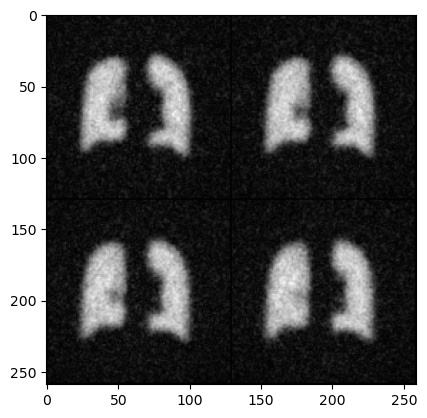

In [138]:
makeSlide(noisy_phasors_1perc_image[:,:,73:77])

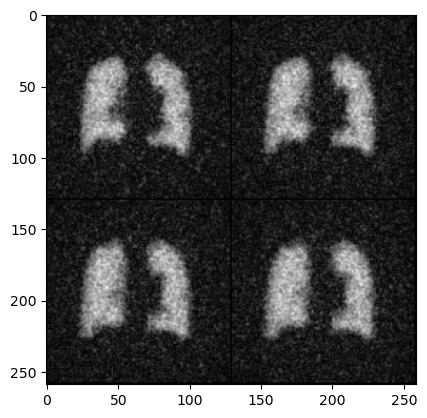

In [139]:
makeSlide(noisy_phasors_2perc_image[:,:,73:77])

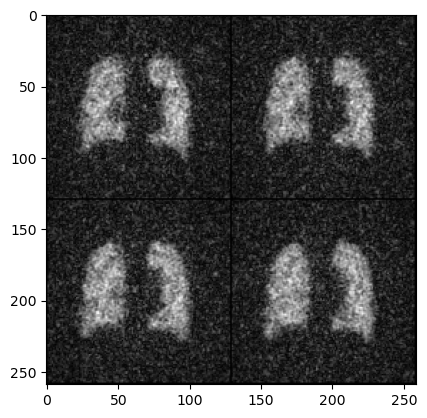

In [140]:
makeSlide(noisy_phasors_3perc_image[:,:,73:77])

In [141]:
psnr_3d_complex(noisy_phasors_1perc_image, original_image)

74.7609699700808

In [142]:
psnr_3d_complex(noisy_phasors_2perc_image, original_image)

72.30488727135334

In [143]:
psnr_3d_complex(noisy_phasors_3perc_image, original_image)

70.7551083891775

In [144]:
ssim(original_image, noisy_phasors_1perc_image, data_range=original_image.max() - original_image.min())

0.7722586896321236

In [145]:
ssim(original_image, noisy_phasors_2perc_image, data_range=original_image.max() - original_image.min())

0.5503695365632478

In [146]:
ssim(original_image, noisy_phasors_3perc_image, data_range=original_image.max() - original_image.min())

0.36395036794763513

## Parameters: KS=0.40 and KE=9*0.40

In [147]:
noisy_phasors_1perc = noisy_phasors_1perc.reshape((noisy_phasors_1perc.shape[0], 1)) # reshape for recon function
noisy_phasors_1perc_image = reconstruct(data=noisy_phasors_1perc, traj=trajlist, kernel_sharpness=float(0.40), kernel_extent=9*float(0.40))
noisy_phasors_1perc_image = np.transpose(noisy_phasors_1perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1] # swap and rotate axes

noisy_phasors_2perc = noisy_phasors_2perc.reshape((noisy_phasors_2perc.shape[0], 1))
noisy_phasors_2perc_image = reconstruct(data=noisy_phasors_2perc, traj=trajlist, kernel_sharpness=float(0.40), kernel_extent=9*float(0.40))
noisy_phasors_2perc_image = np.transpose(noisy_phasors_2perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1]

noisy_phasors_3perc = noisy_phasors_3perc.reshape((noisy_phasors_3perc.shape[0], 1))
noisy_phasors_3perc_image = reconstruct(data=noisy_phasors_3perc, traj=trajlist, kernel_sharpness=float(0.40), kernel_extent=9*float(0.40))
noisy_phasors_3perc_image = np.transpose(noisy_phasors_3perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1]

Execution time: 17.76 seconds
Execution time: 18.12 seconds
Execution time: 18.39 seconds


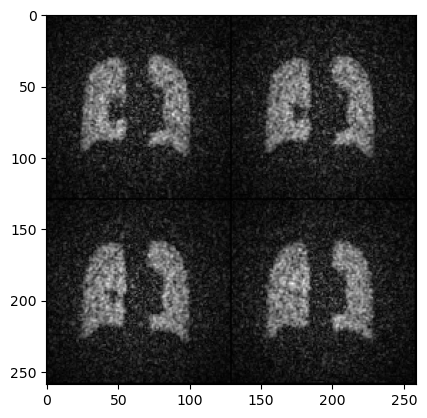

In [148]:
makeSlide(noisy_phasors_1perc_image[:,:,73:77])

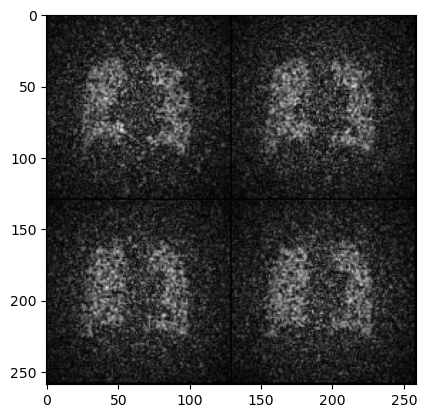

In [149]:
makeSlide(noisy_phasors_2perc_image[:,:,73:77])

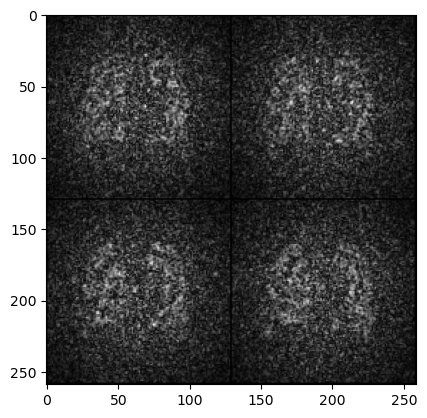

In [150]:
makeSlide(noisy_phasors_3perc_image[:,:,73:77])

In [127]:
psnr_3d_complex(noisy_phasors_1perc_image, original_image)

77.58329521300927

In [128]:
psnr_3d_complex(noisy_phasors_2perc_image, original_image)

75.19628993354938

In [129]:
psnr_3d_complex(noisy_phasors_3perc_image, original_image)

73.7359397235249

In [130]:
ssim(original_image, noisy_phasors_1perc_image, data_range=original_image.max() - original_image.min())

0.8808648459645467

In [131]:
ssim(original_image, noisy_phasors_2perc_image, data_range=original_image.max() - original_image.min())

0.8179767578737639

In [132]:
ssim(original_image, noisy_phasors_3perc_image, data_range=original_image.max() - original_image.min())

0.7318855272420394

## Parameters: KS=0.28 and KE=9*0.28

In [151]:
noisy_phasors_1perc = noisy_phasors_1perc.reshape((noisy_phasors_1perc.shape[0], 1)) # reshape for recon function
noisy_phasors_1perc_image = reconstruct(data=noisy_phasors_1perc, traj=trajlist, kernel_sharpness=float(0.28), kernel_extent=9*float(0.28))
noisy_phasors_1perc_image = np.transpose(noisy_phasors_1perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1] # swap and rotate axes

noisy_phasors_2perc = noisy_phasors_2perc.reshape((noisy_phasors_2perc.shape[0], 1))
noisy_phasors_2perc_image = reconstruct(data=noisy_phasors_2perc, traj=trajlist, kernel_sharpness=float(0.28), kernel_extent=9*float(0.28))
noisy_phasors_2perc_image = np.transpose(noisy_phasors_2perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1]

noisy_phasors_3perc = noisy_phasors_3perc.reshape((noisy_phasors_3perc.shape[0], 1))
noisy_phasors_3perc_image = reconstruct(data=noisy_phasors_3perc, traj=trajlist, kernel_sharpness=float(0.28), kernel_extent=9*float(0.28))
noisy_phasors_3perc_image = np.transpose(noisy_phasors_3perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1]

Execution time: 11.97 seconds
Execution time: 11.33 seconds
Execution time: 11.78 seconds


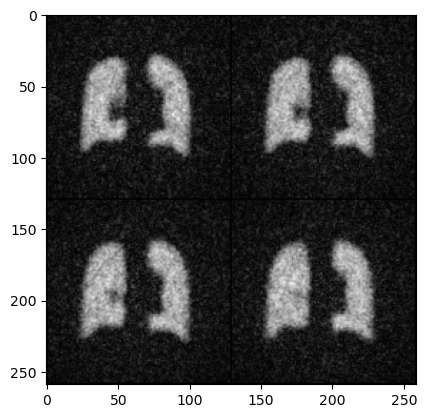

In [152]:
makeSlide(noisy_phasors_1perc_image[:,:,73:77])

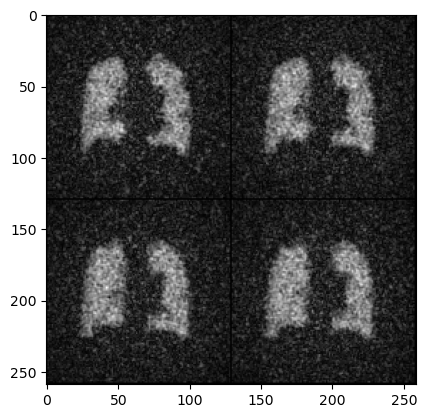

In [153]:
makeSlide(noisy_phasors_2perc_image[:,:,73:77])

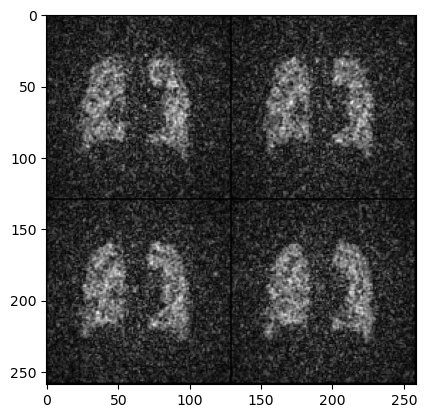

In [154]:
makeSlide(noisy_phasors_3perc_image[:,:,73:77])

## Parameters: KS=0.35 and KE=9*0.35

In [133]:
noisy_phasors_1perc = noisy_phasors_1perc.reshape((noisy_phasors_1perc.shape[0], 1)) # reshape for recon function
noisy_phasors_1perc_image = reconstruct(data=noisy_phasors_1perc, traj=trajlist, kernel_sharpness=float(0.35), kernel_extent=9*float(0.35))
noisy_phasors_1perc_image = np.transpose(noisy_phasors_1perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1] # swap and rotate axes

noisy_phasors_2perc = noisy_phasors_2perc.reshape((noisy_phasors_2perc.shape[0], 1))
noisy_phasors_2perc_image = reconstruct(data=noisy_phasors_2perc, traj=trajlist, kernel_sharpness=float(0.35), kernel_extent=9*float(0.35))
noisy_phasors_2perc_image = np.transpose(noisy_phasors_2perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1]

noisy_phasors_3perc = noisy_phasors_3perc.reshape((noisy_phasors_3perc.shape[0], 1))
noisy_phasors_3perc_image = reconstruct(data=noisy_phasors_3perc, traj=trajlist, kernel_sharpness=float(0.35), kernel_extent=9*float(0.35))
noisy_phasors_3perc_image = np.transpose(noisy_phasors_3perc_image, (1, 2, 0))[127::-1, 127::-1, 127::-1]

Execution time: 12.09 seconds
Execution time: 11.41 seconds
Execution time: 11.76 seconds


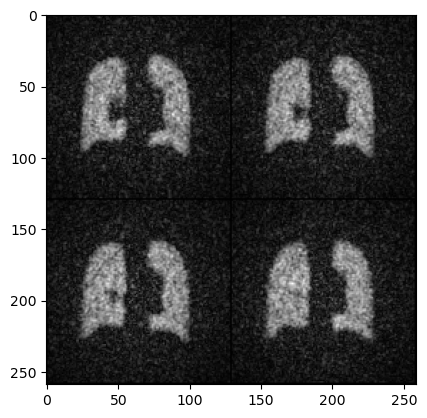

In [134]:
makeSlide(noisy_phasors_1perc_image[:,:,73:77])

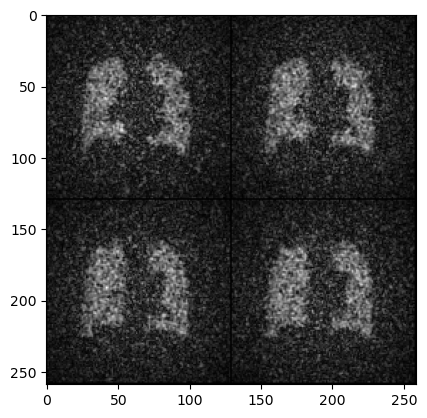

In [135]:
makeSlide(noisy_phasors_2perc_image[:,:,73:77])

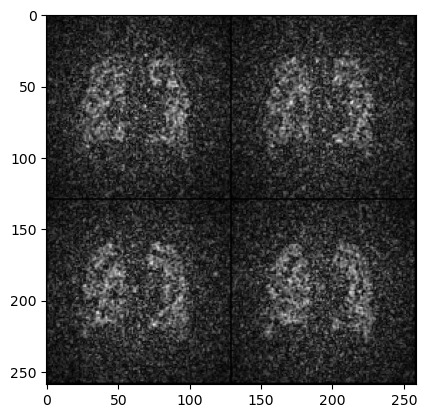

In [136]:
makeSlide(noisy_phasors_3perc_image[:,:,73:77])